In [18]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
file = '../data/IMDB.csv'
df = pd.read_csv(file)

df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [10]:
X, y = df['review'], df['sentiment']
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)

print(x_train.shape, x_test.shape)

(37500,) (12500,)


<AxesSubplot:>

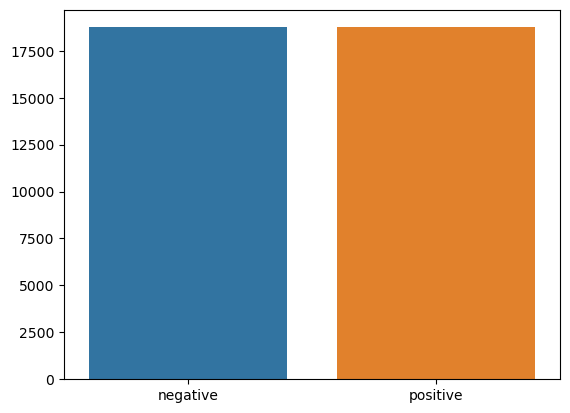

In [11]:
sentiments_train = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['negative','positive']),y=sentiments_train.values)

In [12]:
def preprocess_string(s):
    s = re.sub(r"[^\w\s]", '', s)
    s = re.sub(r"\s+", '', s)
    s = re.sub(r"\d", '', s)
    return s

In [19]:
word_list = []


stop_words = set(stopwords.words('english'))
for sent in x_train:
    for word in sent.lower().split():
        word = preprocess_string(word)
        if word not in stop_words and word != '':
            word_list.append(word)
        


In [26]:
corpus = Counter(word_list)

corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]

onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}


final_list_train,final_list_test = [],[]

In [27]:
for i,w in enumerate(corpus_):
    print(i, w)

0 br
1 movie
2 film
3 one
4 like
5 good
6 even
7 would
8 time
9 really
10 see
11 story
12 much
13 well
14 get
15 also
16 great
17 bad
18 people
19 first
20 dont
21 movies
22 made
23 could
24 make
25 films
26 way
27 characters
28 think
29 watch
30 many
31 seen
32 two
33 character
34 never
35 love
36 acting
37 plot
38 best
39 little
40 know
41 show
42 life
43 ever
44 better
45 still
46 scene
47 say
48 end
49 man
50 scenes
51 something
52 go
53 im
54 back
55 real
56 thing
57 doesnt
58 watching
59 actors
60 didnt
61 years
62 though
63 another
64 actually
65 makes
66 nothing
67 funny
68 look
69 going
70 every
71 lot
72 find
73 new
74 work
75 old
76 part
77 us
78 cant
79 director
80 thats
81 quite
82 want
83 things
84 pretty
85 cast
86 around
87 seems
88 take
89 young
90 enough
91 got
92 fact
93 however
94 world
95 horror
96 big
97 give
98 ive
99 thought
100 may
101 saw
102 without
103 isnt
104 long
105 music
106 original
107 always
108 must
109 come
110 gets
111 right
112 series
113 whole
1